Loading in data

In [2]:
import pandas as pd
import numpy as np

artDF = pd.read_csv('dataUsed/articleInfo.csv')
authDF = pd.read_csv('dataUsed/authorInfo.csv')

df = pd.merge(artDF, authDF, on='Article No.', how='outer')
for (column,data) in df.iteritems():
   df[column] = df[column].fillna(0)  


Yearly publications, citations and publications across countires

Text(0, 0.5, '# of Publications')

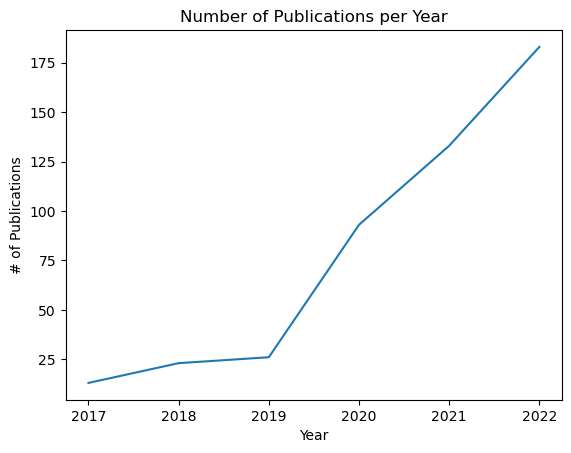

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt


#yearly_publication fig

year = df['Year'].sort_values()
# need to count how many times each value is present
allYears = year.unique()

year_range = year.max() - year.min()

publications = []

for x in range(year_range + 1):
    temp = (year == allYears[x]).sum()
    publications.append(temp)

plt.plot(allYears, publications)
plt.title('Number of Publications per Year')
plt.xlabel('Year')
plt.ylabel('# of Publications')



Text(0, 0.5, '# of Citations')

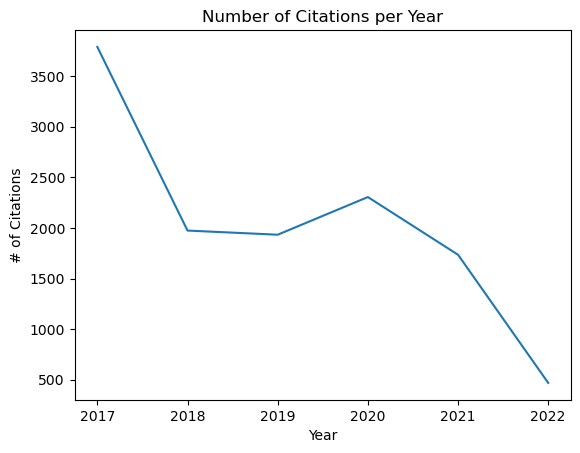

In [4]:
#yearly_citation fig
citations = df[['Year','Citation']].sort_values('Year')

citations_per_year = []
for x in range(year_range + 1):
    citations_per_year.append( 
        citations.loc[citations['Year'] == allYears[x], 'Citation'].sum()
    )


plt.plot(allYears, citations_per_year)
plt.title('Number of Citations per Year')
plt.xlabel('Year')
plt.ylabel('# of Citations')


c:\Users\alecr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


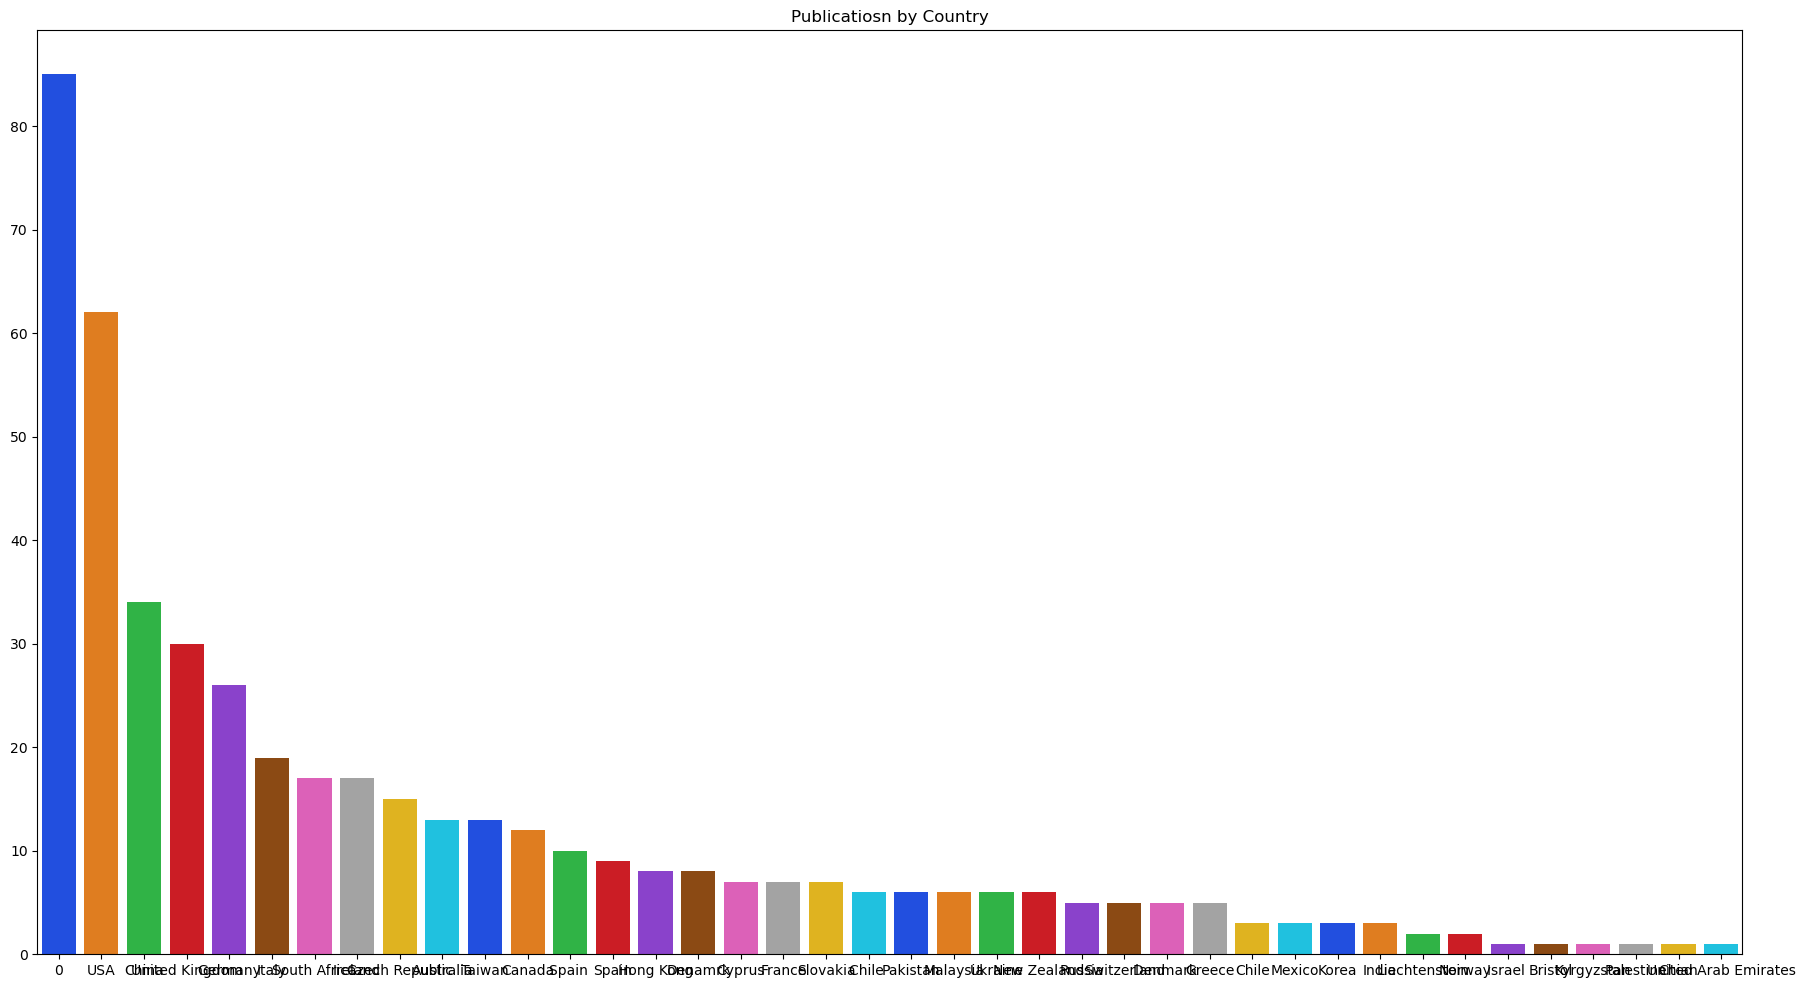

In [25]:
import seaborn as sea
from pygal_maps_world.maps import World
from spellchecker import SpellChecker


#plotting publications around the world
worldmap = World()
worldmap.title = 'Publications aroud the World'

countries = df['Country']
# spell = SpellChecker()
# y = spell.unknown(df['Country'])
# for x in countries:
#     L = [x]
#     spell.correction(L)
    

countries.head()
countryFrequency = countries.value_counts()
plt.figure(figsize=(22, 12))
sea.barplot(countryFrequency.index, countryFrequency.values, palette='bright')
plt.title('Publication by Country')
plt.show()


Top 5 Institutions and Top 5 Researchers

In [17]:


# top 5 institutions
institutions = df['Author Affiliation']
instUnique = institutions.unique()

topFive = institutions.value_counts()[1:6].index.tolist()
#topFive.remove(0)
print(*topFive, sep=', ')




University of the Western Cape, Masaryk University, University College Cork, Intel Corporation, Madigan Army Medical Center


In [6]:
authors = df[['Author Name', 'h-index']].sort_values('h-index', ascending=False)
topFiveH_Ind = authors[0:5]['Author Name'].values.tolist()

print(*topFiveH_Ind, sep=', ')


Ulrich Trautwein, Nicolas Molinari, George S. Athwal, Vicente A. González, Maria Luisa Lorusso
